In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
# First we read the data
df = pd.read_csv("listings.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534710,13.418100,Entire home/apt,83.0,63,148,2023-05-25,0.84,1,15,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.532690,13.418050,Entire home/apt,180.0,6,7,2020-01-04,0.07,1,47,0,03/Z/RA/003410-18
2,183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,Minel,Charlottenburg-Wilm.,Neue Kantstraße,52.500010,13.303490,Entire home/apt,116.0,2,570,2023-11-26,3.92,1,336,50,04/Z/ZA/004232-16
3,14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.548130,13.403660,Entire home/apt,70.0,150,26,2023-11-30,0.16,4,107,1,NaN
4,16644,Condo in Berlin · ★4.72 · 1 bedroom · 1 bed · ...,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.503120,13.435080,Entire home/apt,90.0,93,48,2017-12-14,0.29,2,225,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13322,1048290130755102956,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,168840227,Rounak,Pankow,Prenzlauer Berg Nordwest,52.552905,13.400229,Entire home/apt,47.0,1,0,NaN,NaN,1,231,0,First name and Last name: Rounak Kakwani <br/>...
13323,1048444986736672883,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,551079357,Esra,Mitte,Alexanderplatz,52.522356,13.426044,Entire home/apt,87.0,2,0,NaN,NaN,1,65,0,First name and Last name: Esra Kocatürk <br/> ...
13324,1048535169043506669,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,551034226,Pietro,Charlottenburg-Wilm.,Volkspark Wilmersdorf,52.485782,13.335904,Entire home/apt,58.0,1,0,NaN,NaN,1,171,0,First name and Last name: Pietro manfregola <b...
13325,1048637262243761764,Rental unit in Berlin · ★New · 3 bedrooms · 3 ...,29385449,Luis,Mitte,Brunnenstr. Nord,52.544105,13.373386,Entire home/apt,161.0,1,0,NaN,NaN,3,11,0,Legal entity name and Legal form: Spacifik UG ...


In [104]:
print("Data Shape [number of rows, number of columns]: {}".format(df.shape))

Data Shape [number of rows, number of columns]: (13327, 18)


In [105]:
# information about the data the type of cloumns and non null number of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13327 entries, 0 to 13326
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13327 non-null  int64  
 1   name                            13327 non-null  object 
 2   host_id                         13327 non-null  int64  
 3   host_name                       13318 non-null  object 
 4   neighbourhood_group             13327 non-null  object 
 5   neighbourhood                   13327 non-null  object 
 6   latitude                        13327 non-null  float64
 7   longitude                       13327 non-null  float64
 8   room_type                       13327 non-null  object 
 9   price                           9374 non-null   float64
 10  minimum_nights                  13327 non-null  int64  
 11  number_of_reviews               13327 non-null  int64  
 12  last_review                     

In [106]:
print("show mean and the three quartiles and std of numerical columns")
df.describe().T

show mean and the three quartiles and std of numerical columns


,count,mean,std,min,25%,50%,75%,max
id,13327.0,2.726391e+17,4.000348e+17,3176.00000,1.723423e+07,3.916137e+07,6.968867e+17,1.049081e+18
host_id,13327.0,1.481982e+08,1.686400e+08,1581.00000,1.362112e+07,6.108240e+07,2.577263e+08,5.510794e+08
latitude,13327.0,5.250976e+01,3.348058e-02,52.36904,5.249037e+01,5.250963e+01,5.253240e+01,5.265611e+01
longitude,13327.0,1.340248e+01,6.676202e-02,13.10758,1.336429e+01,1.341144e+01,1.343816e+01,1.372139e+01
price,9374.0,1.245171e+02,3.837520e+02,9.00000,6.200000e+01,9.100000e+01,1.390000e+02,2.499900e+04
minimum_nights,13327.0,4.279733e+01,5.396353e+01,1.00000,2.000000e+00,6.000000e+00,9.200000e+01,1.100000e+03
number_of_reviews,13327.0,3.728521e+01,8.293426e+01,0.00000,1.000000e+00,7.000000e+00,3.300000e+01,2.363000e+03
reviews_per_month,10327.0,1.152360e+00,1.820554e+00,0.01000,1.300000e-01,5.100000e-01,1.580000e+00,5.673000e+01
calculated_host_listings_count,13327.0,9.276131e+00,3.178925e+01,1.00000,1.000000e+00,1.000000e+00,3.000000e+00,2.310000e+02
availability_365,13327.0,1.205978e+02,1.350940e+02,0.00000,0.000000e+00,5.800000e+01,2.570000e+02,3.650000e+02


In [107]:
# check if there a duplication of rows in the data
df.duplicated().sum()

0

In [108]:
df["id"].nunique()

13327

In [109]:
print("Show number of null values in every column")
df.isna().sum()

Show number of null values in every column


id                                   0
name                                 0
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3953
minimum_nights                       0
number_of_reviews                    0
last_review                       3000
reviews_per_month                 3000
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5091
dtype: int64

all of these columns:
{
host_name 

last_review

reviews_per_month

Price 

license
}
contain some null values that we have to deal with so we will see how to deal with 
remove it or fill it or maybe remove the whole column if it's not necessary

In [110]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83.0,63,148,2023-05-25,0.84,1,15,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180.0,6,7,2020-01-04,0.07,1,47,0,03/Z/RA/003410-18
2,183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,Minel,Charlottenburg-Wilm.,Neue Kantstraße,52.50001,13.30349,Entire home/apt,116.0,2,570,2023-11-26,3.92,1,336,50,04/Z/ZA/004232-16
3,14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70.0,150,26,2023-11-30,0.16,4,107,1,NaN
4,16644,Condo in Berlin · ★4.72 · 1 bedroom · 1 bed · ...,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90.0,93,48,2017-12-14,0.29,2,225,0,NaN


There is no information from id , name ,host_id, licence, last_review, longitude, latitude

In [111]:
# Delete unnecessary columns
features = ["id", "name", "host_id","license", "last_review","longitude", "latitude"]
df.drop(features, axis = 1, inplace = True)
df.shape

(13327, 11)

In [112]:
df.head()

,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Britta,Pankow,Prenzlauer Berg Südwest,Entire home/apt,83.0,63,148,0.84,1,15,1
1,Philipp,Pankow,Prenzlauer Berg Südwest,Entire home/apt,180.0,6,7,0.07,1,47,0
2,Minel,Charlottenburg-Wilm.,Neue Kantstraße,Entire home/apt,116.0,2,570,3.92,1,336,50
3,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,Entire home/apt,70.0,150,26,0.16,4,107,1
4,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,Entire home/apt,90.0,93,48,0.29,2,225,0


These Columns have some missing values we could simply drop them because they don't exceed 10% our data

In [113]:
df['host_name'].isna().sum()/df.shape[0]

0.0006753207773692504

In [114]:
# drop null values of host_name column
df.dropna(subset=["host_name"],inplace=True)

In [115]:
df['reviews_per_month'].isna().sum()/df.shape[0]

0.22488361615858238

In [116]:
# drop null values of reviews per month column
df.dropna(subset=["reviews_per_month"],inplace=True)

In [117]:
df.price.isna().sum()/df.shape[0]

0.2882882882882883

In [118]:
# drop null values of reviews per month column
df.dropna(subset=["price"],inplace=True)

In [119]:
df.isna().sum()

host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [120]:
df.shape

(7347, 11)

In [121]:
# there it is some statistical for both numerical and catagorical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,7347.0,128.768749,427.486552,9.00,65.00,95.00,145.00,24999.00
minimum_nights,7347.0,20.627467,50.022812,1.00,2.00,3.00,6.00,1000.00
number_of_reviews,7347.0,61.815027,103.609553,1.00,6.00,22.00,73.00,2363.00
reviews_per_month,7347.0,1.513958,2.021249,0.01,0.31,0.92,2.11,56.73
calculated_host_listings_count,7347.0,5.797332,14.743848,1.00,1.00,1.00,5.00,231.00
availability_365,7347.0,153.666803,131.425098,0.00,21.00,132.00,281.00,365.00
number_of_reviews_ltm,7347.0,15.965428,25.550911,0.00,1.00,7.00,22.00,716.00


In [122]:
df.describe(include='object').T

,count,unique,top,freq
host_name,7347,2331,Flo,83
neighbourhood_group,7347,12,Mitte,1682
neighbourhood,7347,135,Alexanderplatz,595
room_type,7347,4,Entire home/apt,5153


In [123]:
# from the statical summary we found that some columns have unique value Unique such as Room Type and Neighbourhood group and Neighbourhood
print('Unique value for room_type are :',df.room_type.unique())
print('\nUnique value for neighbourhood_group are :',df.neighbourhood_group.unique())
print('\nUnique value for neighbourhood are :',df.neighbourhood.unique())


Unique value for room_type are : ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']

Unique value for neighbourhood_group are : ['Pankow' 'Charlottenburg-Wilm.' 'Friedrichshain-Kreuzberg'
 'Steglitz - Zehlendorf' 'Neukölln' 'Tempelhof - Schöneberg' 'Mitte'
 'Lichtenberg' 'Treptow - Köpenick' 'Marzahn - Hellersdorf' 'Spandau'
 'Reinickendorf']

Unique value for neighbourhood are : ['Prenzlauer Berg Südwest' 'Neue Kantstraße' 'Prenzlauer Berg Nordwest'
 'nördliche Luisenstadt' 'Zehlendorf  Nord' 'Reuterstraße'
 'Schöneberg-Nord' 'Prenzlauer Berg Ost' 'Brunnenstr. Süd'
 'Tempelhofer Vorstadt' 'Buckow Nord' 'Pankow Süd' 'Helmholtzplatz'
 'Karlshorst' 'Karl-Marx-Allee-Nord' 'Düsseldorfer Straße'
 'Regierungsviertel' 'Frankfurter Allee Süd FK' 'Rudow' 'Alt  Treptow'
 'Mierendorffplatz' 'Otto-Suhr-Allee' 'südliche Luisenstadt'
 'Wedding Zentrum' 'Neuköllner Mitte/Zentrum' 'Brunnenstr. Nord'
 'Moabit West' 'Altglienicke' 'Prenzlauer Berg Nord' 'Moabit Ost'
 'Kantstraße' 'Alexanderpl

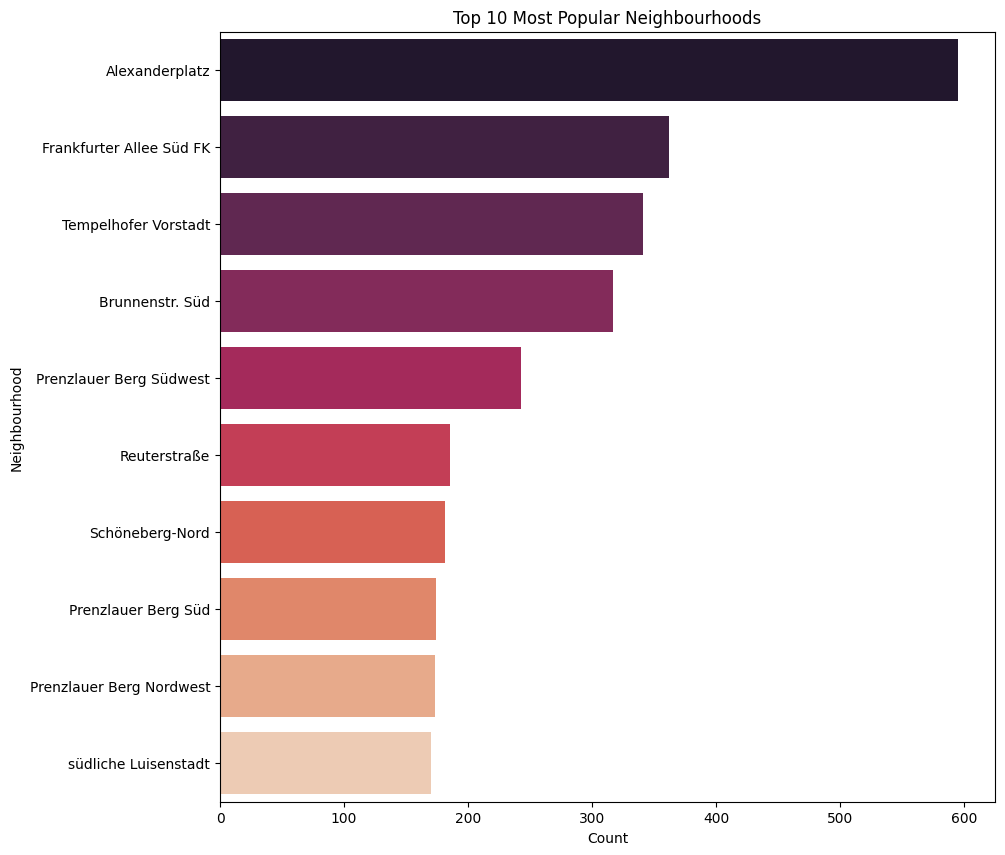

In [124]:
# Most popular neighbourhoods based on count
plt.figure(figsize=(10, 10))
popular_neighbourhoods = df['neighbourhood'].value_counts().head(10)
sns.barplot(x=popular_neighbourhoods.values, y=popular_neighbourhoods.index,hue = popular_neighbourhoods.index,legend= False ,palette='rocket')
plt.title('Top 10 Most Popular Neighbourhoods')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()


Alexanderplatz seems to be the most populare neighbourhood

<Axes: xlabel='room_type', ylabel='count'>

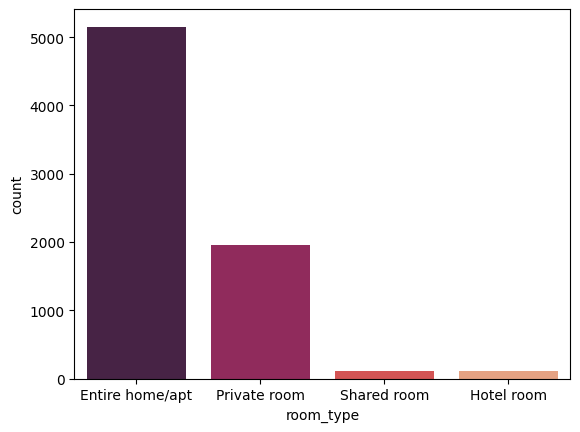

In [127]:
sns.countplot(x="room_type",data=df,palette='rocket', hue = "room_type", legend=False)

its obvious that the Entire home or apartement and Private room  counts are more than the shared rooms and hotel room.although, in genral Shared rooms costs less.

In [141]:
# we want to see the top 10 Entire home/apt listings
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)


,host_name,neighbourhood,neighbourhood_group,apartment
1090,Flo,Alexanderplatz,Mitte,38
929,Elena,Alexanderplatz,Mitte,36
895,Downtown Apartments,Brunnenstr. Nord,Mitte,31
896,Downtown Apartments Berlin,Brunnenstr. Süd,Mitte,29
2010,Limehome,Prenzlauer Berg Südwest,Pankow,21
2671,Only ElPilar,Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,20
2101,MAVO Hospitality,Tempelhof,Tempelhof - Schöneberg,14
2382,Mia,Alexanderplatz,Mitte,14
342,Apartmently,Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,14
1509,James,Schöneberg-Nord,Tempelhof - Schöneberg,14


In [143]:
# we want to see the 10 top private room listings
private = df[df['room_type']=='Private room']
list_private = private.groupby(['host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,neighbourhood_group,private
149,Apartment Hotel Wittenau,MV 2,Reinickendorf,12
863,Marcin,Schöneberg-Nord,Tempelhof - Schöneberg,11
464,Frank,Schloß Charlottenburg,Charlottenburg-Wilm.,11
864,Marco,Karl-Marx-Allee-Süd,Friedrichshain-Kreuzberg,10
1439,Westlife Apart Hotel,Heerstrasse,Charlottenburg-Wilm.,10
1435,W22 Hotel,Düsseldorfer Straße,Charlottenburg-Wilm.,9
151,Apple City,Moabit West,Mitte,9
779,Laura,nördliche Luisenstadt,Friedrichshain-Kreuzberg,9
291,Claudius,Neuköllner Mitte/Zentrum,Neukölln,8
345,Dharma Mati,Westend,Charlottenburg-Wilm.,8


In [144]:
# we want to see the top 10 Hotel room  listings
apt = df[df['room_type']=='Hotel room']
list_apt = apt.groupby(['host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_name,neighbourhood,neighbourhood_group,apartment
24,Lindemann'S,Schöneberg-Nord,Tempelhof - Schöneberg,7
1,Anna 1908,Friedenau,Tempelhof - Schöneberg,6
39,Team Suite030,Spandau Mitte,Spandau,6
31,SMARTments,Karlshorst,Lichtenberg,6
32,SMARTments,Otto-Suhr-Allee,Charlottenburg-Wilm.,6
36,TWO Hotel Berlin By Axel - Adults,Volkspark Wilmersdorf,Charlottenburg-Wilm.,5
16,Fjord Hotel Berlin,Tiergarten Süd,Mitte,5
9,CALMA Berlin Mitte,Alexanderplatz,Mitte,4
27,Michael,Regierungsviertel,Mitte,4
23,Laurenz,Brunnenstr. Süd,Mitte,4


In [145]:
apt = df[df['room_type']=='Shared room']
list_apt = apt.groupby(['host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_name,neighbourhood,neighbourhood_group,apartment
21,Singer Hostel Berlin,Alexanderplatz,Mitte,25
22,Singer Hostel Berlin,Karl-Marx-Allee-Süd,Friedrichshain-Kreuzberg,13
25,Sunflower Hostel,Karl-Marx-Allee-Süd,Friedrichshain-Kreuzberg,10
23,St Christophers Inn Berlin,Alexanderplatz,Mitte,8
12,Grand Hostel Berlin,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,6
3,Anna,Schöneberg-Nord,Tempelhof - Schöneberg,5
17,Nena Hostel Berlin,Osloer Straße,Mitte,5
24,St Christophers Inn Berlin Mitte,Alexanderplatz,Mitte,5
13,Grand Hostel Berlin Urban,Reuterstraße,Neukölln,4
4,Ayhan,Reuterstraße,Neukölln,3


<Axes: xlabel='neighbourhood_group', ylabel='count'>

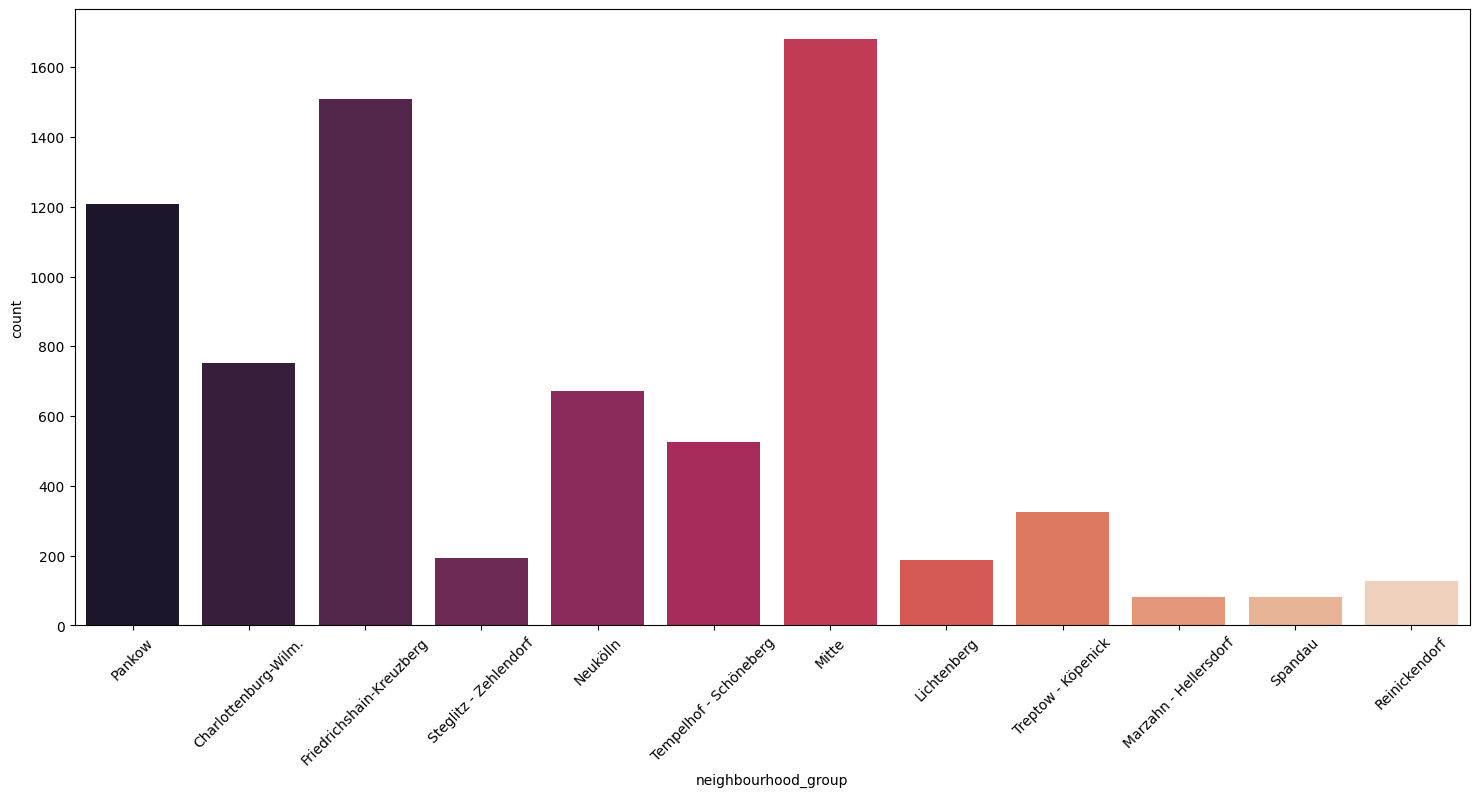

In [160]:
plt.figure(figsize=(18,8))
plt.tick_params(axis='x', labelrotation=45)
sns.countplot(x="neighbourhood_group",data=df,palette='rocket', hue = "neighbourhood_group", legend=False)

From the above Mitte, Friedrichshain-Kreuzberg,and Pankow has more number of listing than the others.

In [162]:
# now we want to explore the price as it can impact the demand
df['price'].describe()

count     7347.000000
mean       128.768749
std        427.486552
min          9.000000
25%         65.000000
50%         95.000000
75%        145.000000
max      24999.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

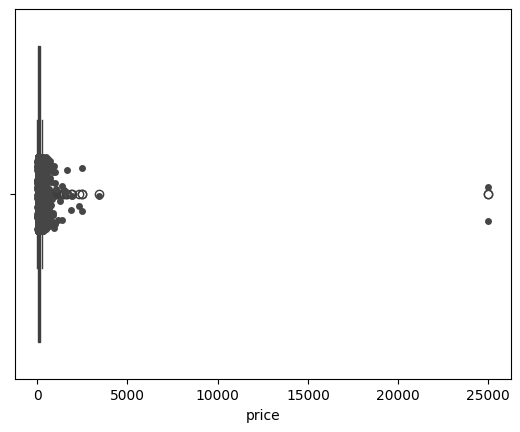

In [167]:
sns.boxplot(x = "price", data = df)
sns.stripplot(x = "price", data = df, color = "#474646")

We seem to have some outliers



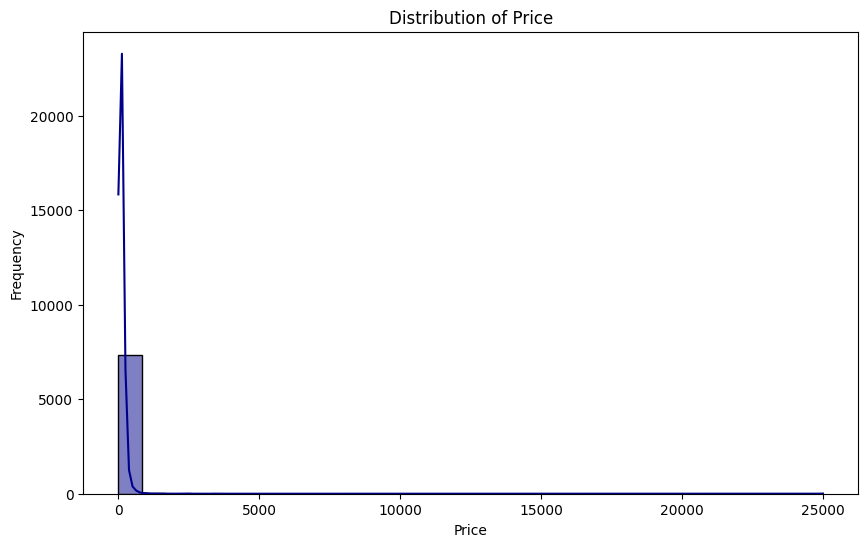

In [164]:
#Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [168]:
# Price Outliers removal
# Calculate the Interquartile Range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

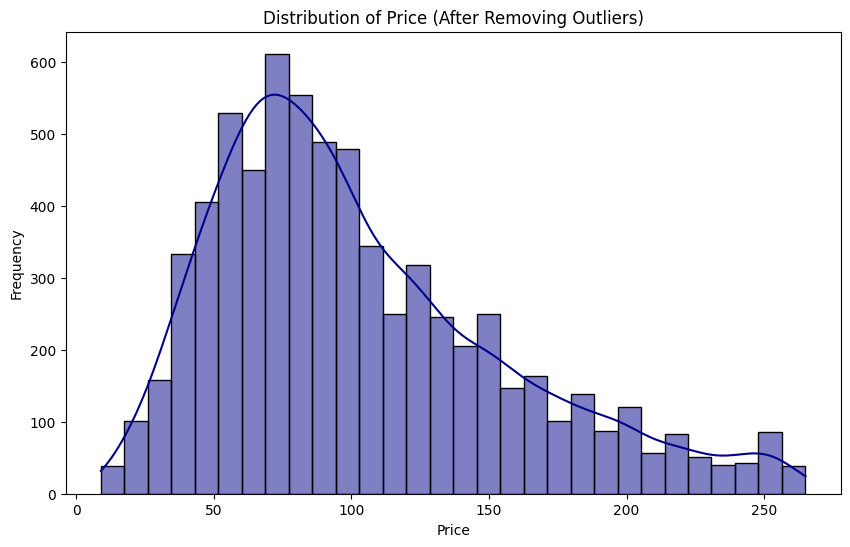

In [170]:
# Distributions of price after removing the outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Price (After Removing Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

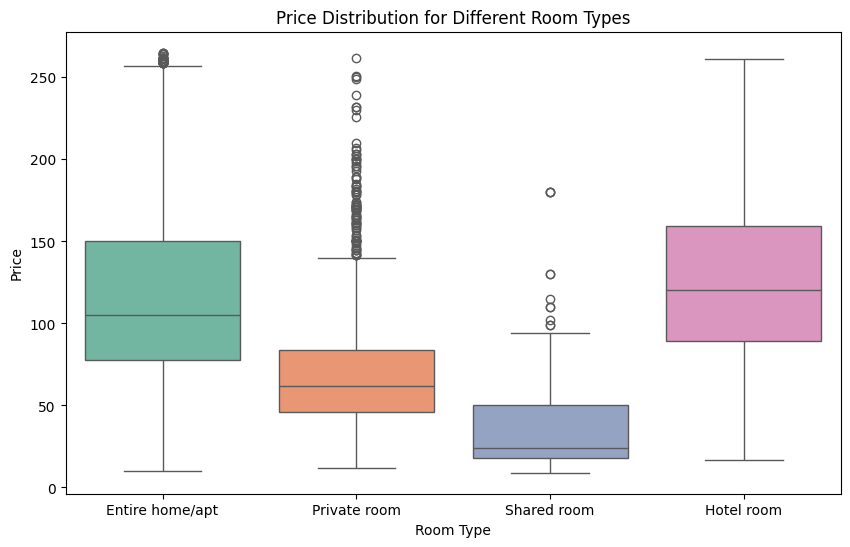

In [173]:
# Price for different room types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='room_type', y='price', palette='Set2',hue = "room_type", legend = False)
plt.title('Price Distribution for Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

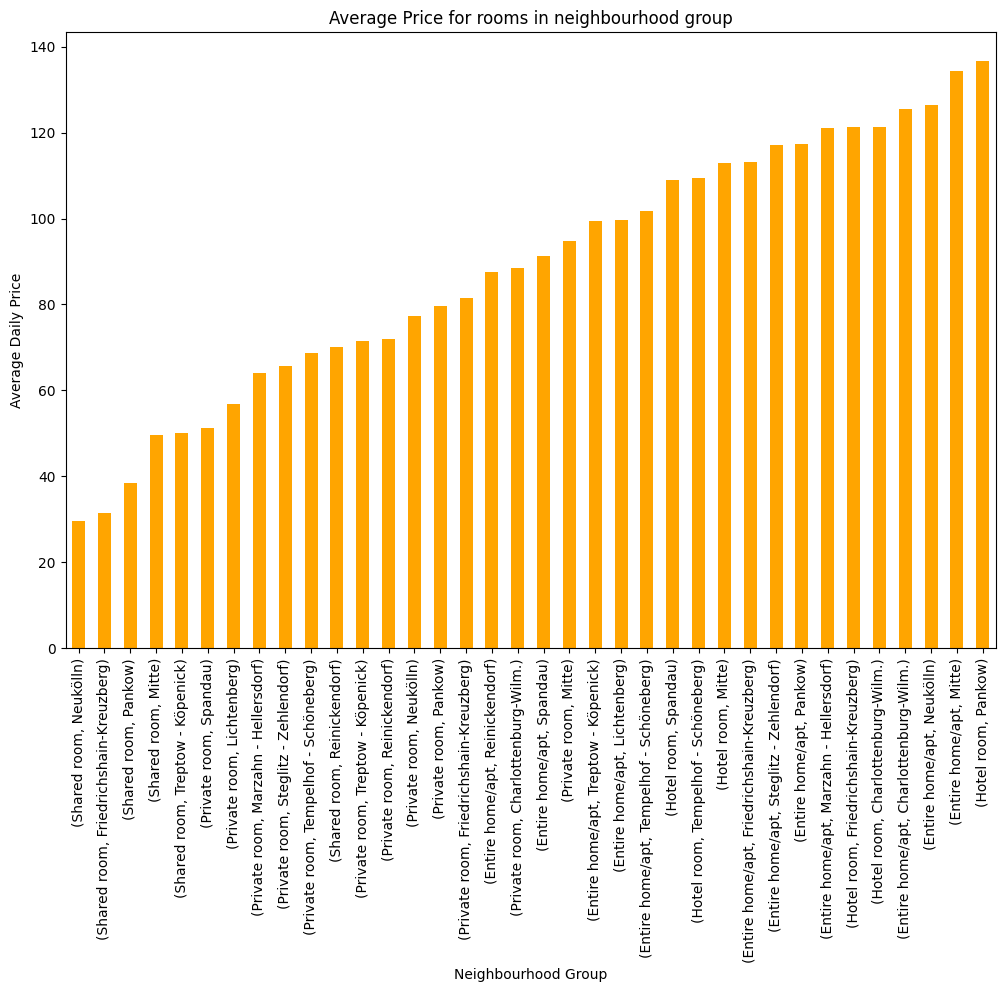

In [183]:
# price consider improtant factor so we will find the average price per night based on neighborhod group.
plt.figure(figsize=(12, 8))
data = df_cleaned[df_cleaned['minimum_nights'] == 1]
df1 = data.groupby(['room_type', 'neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar', color='orange')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()


Shared room at Neukolln is the most cheapest stay per night whereas Renting a hotel room at Pankow per night is the most expensive.

Average price for shared room is also considerably expensive at Reinickendorf so is the shared room at Reinickendorf and the most expensive private room is at Mitte and most expenstive entire home is at Mitte too so Mitte is one of the expensive neighbourhood and pankow their hotel is very expensive too.


In [191]:
print(df_cleaned['neighbourhood'].unique())


['Prenzlauer Berg Südwest' 'Neue Kantstraße' 'Prenzlauer Berg Nordwest'
 'nördliche Luisenstadt' 'Zehlendorf  Nord' 'Reuterstraße'
 'Schöneberg-Nord' 'Prenzlauer Berg Ost' 'Brunnenstr. Süd'
 'Tempelhofer Vorstadt' 'Buckow Nord' 'Pankow Süd' 'Helmholtzplatz'
 'Karlshorst' 'Karl-Marx-Allee-Nord' 'Düsseldorfer Straße'
 'Regierungsviertel' 'Frankfurter Allee Süd FK' 'Rudow' 'Alt  Treptow'
 'Mierendorffplatz' 'Otto-Suhr-Allee' 'südliche Luisenstadt'
 'Wedding Zentrum' 'Neuköllner Mitte/Zentrum' 'Brunnenstr. Nord'
 'Moabit West' 'Altglienicke' 'Prenzlauer Berg Nord' 'Moabit Ost'
 'Kantstraße' 'Alexanderplatz' 'Schmargendorf' 'Lichtenrade' 'Mahlsdorf'
 'Blankenfelde/Niederschönhausen' 'Zehlendorf  Südwest' 'Johannisthal'
 'Frankfurter Allee Nord' 'Schöneberg-Süd' 'Marienfelde' 'Friedenau'
 'Tiergarten Süd' 'Südliche Friedrichstadt' 'Wiesbadener Straße'
 'Heerstraße Nord' 'Rixdorf' 'Blankenburg/Heinersdorf/Märchenland'
 'Pankow Zentrum' 'Karl-Marx-Allee-Süd' 'Baumschulenweg'
 'Rahnsdorf/Hessen

In [196]:
# Group by neighborhood and calculate the mean price
neighborhood_prices = df_cleaned.groupby("neighbourhood")["price"].mean().reset_index()

# Sort the neighborhoods by price in descending order to find the most expensive
most_expensive_neighborhoods = neighborhood_prices.sort_values(by="price", ascending=False).head(10)

# Sort the neighborhoods by price in ascending order to find the least expensive
least_expensive_neighborhoods = neighborhood_prices.sort_values(by="price", ascending=True).head(10)

print("Top 10 most expensive neighborhoods:")
most_expensive_neighborhoods

Top 10 most expensive neighborhoods:


,neighbourhood,price
44,Haselhorst,216.857143
30,Forst Grunewald,174.750000
113,Spandau Mitte,141.909091
75,Müggelheim,133.625000
100,Regierungsviertel,132.101266
25,Dammvorstadt,128.555556
18,Brunnenstr. Süd,128.207407
71,Marzahn-Süd,127.636364
57,Kurfürstendamm,125.413793
98,Prenzlauer Berg Südwest,123.981395


In [248]:
print("Top 10 least expensive neighborhoods:")
least_expensive_neighborhoods

Top 10 least expensive neighborhoods:


,neighbourhood,price
48,Hellersdorf-Süd,20.000000
77,Neu-Hohenschönhausen Nord,29.000000
3,Allende-Viertel,44.500000
19,Brunsbütteler Damm,46.600000
78,Neu-Hohenschönhausen Süd,47.000000
125,West 3,51.500000
62,Lankwitz,53.714286
70,Marzahn-Mitte,55.000000
24,Charlottenburg Nord,55.250000
50,Johannisthal,56.625000


Haselhorst is the most expensive in terms of neighbourhood. Whereas Hellersdorf-Sud locality is the least expensive to stay.

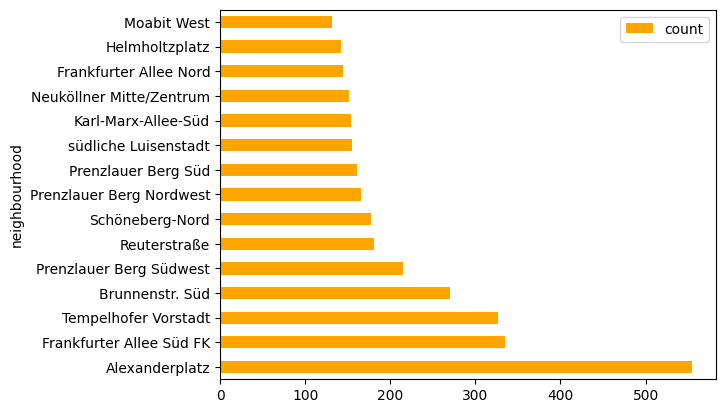

In [201]:
# Most number of locality listed
df5 = df_cleaned.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count'])['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})
df5.head(15).plot(kind='barh',color = "orange")
plt.show()

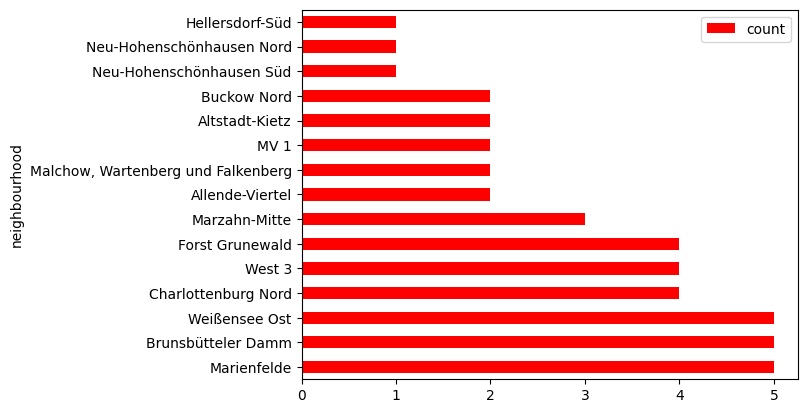

In [203]:
# least number of locality listed
df5.tail(15).plot(kind = "barh", color = "red")
plt.show()

We can see Alexanderplatz has most number of listing count where as Hellersdorf-sud has one of the least listing

In [204]:
# now we want to explore how each neighbourhood(location) is doing in respect to review because review play a role :
# A cheap place with bad review is not aoption as an expensive place with nicest review.
fig = plt.figure(figsize=(12,4))
review_50 = df_cleaned[df_cleaned['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

 Count of Review v/s neighbourhood group


,count
neighbourhood_group,
Mitte,579
Friedrichshain-Kreuzberg,501
Pankow,394
Charlottenburg-Wilm.,229
Neukölln,167
Tempelhof - Schöneberg,163
Treptow - Köpenick,78
Lichtenberg,66
Steglitz - Zehlendorf,41


<Figure size 1200x400 with 0 Axes>

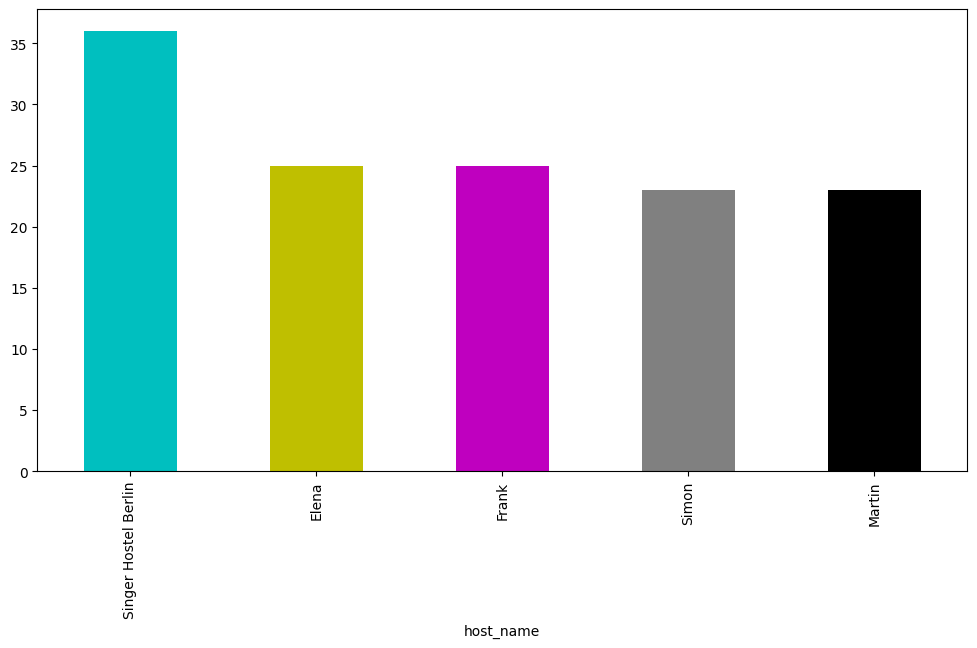

In [206]:
# Based on the review score(Minimum 50) we will see who is our top 5 Host
plt.figure(figsize=(12,6))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['c','y','m','grey','black'])

<Axes: xlabel='availability_365', ylabel='price'>

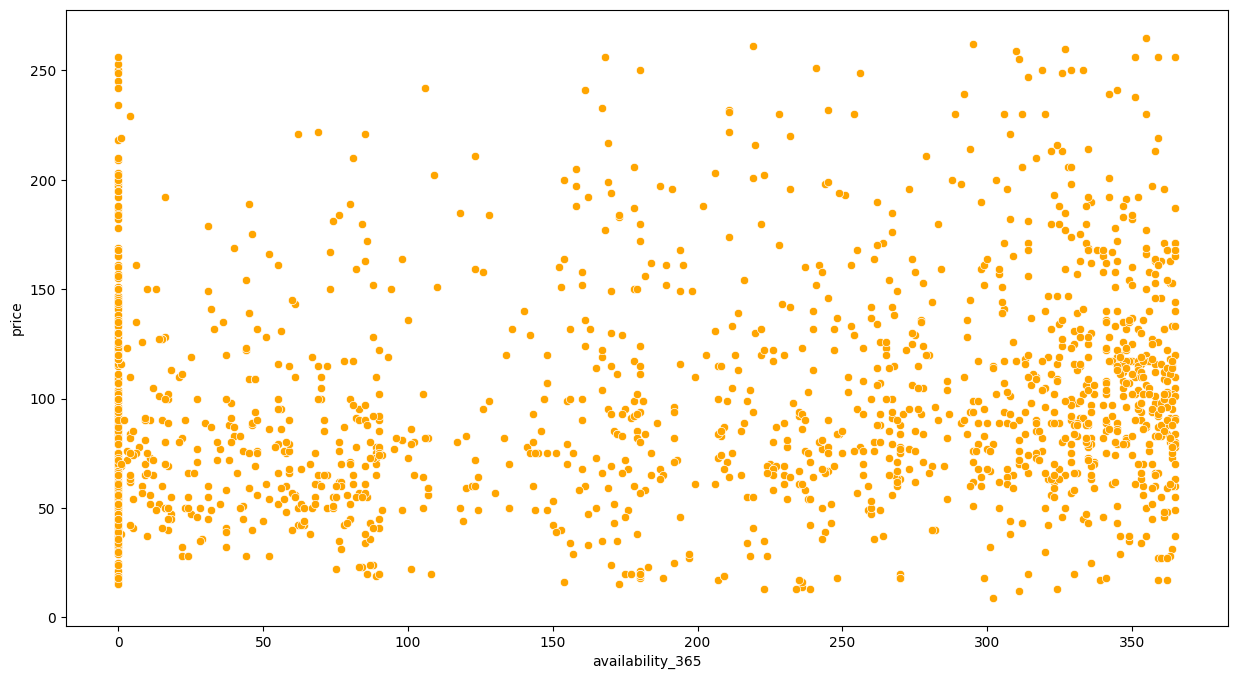

In [209]:
# now we will see if the price will cahnge based on the availability :
plt.figure(figsize=(15,8))
sns.scatterplot(y=df_cleaned['price'],x=data['availability_365'],color = "orange")

 looks like with no availability 365 or with the price doesn't affect which indicates that availibaility has no impact on price

In [247]:
# Assuming review_50 is your DataFrame containing the necessary data

# Calculate mean for each neighborhood group and room type
df6 = review_50.groupby(['neighbourhood_group', 'room_type']).agg({'price': 'mean'})

# Drop unnecessary columns
df6 = df6.reset_index()

# Sort values by neighbourhood_group
df6 = df6.sort_values('neighbourhood_group')

# Display the result
df6

,neighbourhood_group,room_type,price
0,Charlottenburg-Wilm.,Entire home/apt,110.423611
1,Charlottenburg-Wilm.,Hotel room,96.500000
2,Charlottenburg-Wilm.,Private room,58.292683
3,Charlottenburg-Wilm.,Shared room,45.000000
4,Friedrichshain-Kreuzberg,Entire home/apt,113.738372
5,Friedrichshain-Kreuzberg,Hotel room,111.333333
6,Friedrichshain-Kreuzberg,Private room,68.901515
7,Friedrichshain-Kreuzberg,Shared room,21.863636
10,Lichtenberg,Private room,52.920000
8,Lichtenberg,Entire home/apt,93.578947


from above we can see that availabilty doesnt have a huge impact like the location, price and reviews